In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit


In [2]:
ucnaP = {
 #   "1": "/home/rhythm/Research/ml/research/2024/mar/uniformcosThDistributionMar22/ucnaP_asymmetry.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root",/home/rhythm/Research/ml/research/2024/mar/checking-eventgenchangeddd/ucnaP_asymmetry_eventgenchanged_mar27_largeFiles.root
# "1": "/home/rhythm/Research/ml/research/2024/mar/checking-eventgenchangeddd/ucnaP_asymmetry_eventGenChanged_90Million.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root",
 "1" :  "/home/rhythm/Research/ml/research/2024/mar/checking-eventgenchangeddd/ucnaP_asymmetry_eventGenChanged_80Million_includingAllType.root", # 1keV

}

In [ ]:
ucnaP_5 = {"1" :  "/home/rhythm/Research/ml/research/2024/mar/checking-eventgenchangeddd/ucnaP_asymmetry_eventGenChanged_80Million_includingAllType_binwidth5kev.root"
}

In [ ]:
#converting them to df
ucna_p_1 = uproot.open(ucnaP["1"])

ucna_p_1.keys()

In [ ]:
keys_direct = ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','misEdepType01;1','misEdepType11;1','misEdepType02;1','misEdepType12;1',]

In [3]:
keys_wBS = ['KE;1','eTrue1;1', 'eTrue2;1', 'EdepType01;1', 'EdepType11;1', 'EdepType02;1', 'EdepType12;1',]

In [ ]:
keys_angle = ['pzE;1','pzKE0;1','pz01;1','pz02;1','pz11;1','pz12;1' ]

In [6]:

eLower = [50,100, 120,150,180,220,260,300]
eUpper = 660
nTot = {}
for key, value in ucnaP.items():
    root_file = uproot.open(value)

    histogram = root_file['KE;1']
    nTot[key]=[]
    for energy in eLower:
        # Define the range of bins you're interested in
        lower_value = energy  # Replace with your lower bound
        upper_value = eUpper  # Replace with your upper bound

        # Get the bin edges and contents
        bin_edges = histogram.axis().edges()
        bin_contents = histogram.values()

        # Find the indices corresponding to the bin edges
        bin_start = (bin_edges >= lower_value).nonzero()[0][0]
        bin_end = (bin_edges <= upper_value).nonzero()[0][-1]

        # Calculate the total content within the specified range
        total_content = sum(bin_contents[bin_start:bin_end])

        nTot[key].append(total_content)

In [7]:
nTot

{'1': [75596079.0,
  69727704.0,
  66948469.0,
  62449449.0,
  57650920.0,
  50962551.0,
  44139667.0,
  37381211.0]}

In [8]:
nTot =  [75596079.0,69727704.0,66948469.0,62449449.0,57650920.0,50962551.0,44139667.0,37381211.0]

In [10]:
ucnaP_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys_wBS:
            # Access the specific branch using the key
            branch = file[key]
            

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['KE;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaP_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1


In [ ]:
ucnaP_df["1"]

In [ ]:
ucnaPAngleInfo_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys_angle:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['pz01;1'].rename('cosTh')

        # Concatenate values_df and select_edge_col
        ucnaPAngleInfo_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


In [ ]:
plt.figure(figsize=(10,8))
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz01;1"]/nEvents,c  = 'red',label = 'UCNA+ hits det1')
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz02;1"]/nEvents,c  = 'orange',label = 'UCNA+ hits det2')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz01;1"]/nEvents, c='blue', label = 'UCNA+ forward')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz02;1"]/nEvents, c='green', label = 'UCNA+ backwar')
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pzE;1"]/nEvents,c  = 'red',label = 'cos theta distribution')

#plt.yscale('log')
plt.yticks(fontsize = 16)
plt.ylim(0.0, 0.0055)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution ", fontsize = 16)
plt.savefig(f'./mar/checking-eventgenchangeddd/cosTh.png')

In [18]:
def beta (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta

In [16]:
def asymm_meas(df, col1, col2, col,errCol):
    df[col] = (df[col1] - df[col2])/(df[col1] + df[col2])
    df[errCol] = df[col]*np.sqrt((1/df[col1]) + (1/df[col2])) 
    
    return df

In [17]:
def asymm_meas_withBetaCorr(df, col1, col2, col,errCol):
    df['EMid'] = (df['Evals'] + df['Evals'].shift(-1)) / 2
   # Set the first index of the new column to 0
    df['EMidNew'] = df['EMid'].shift(1)
    df.at[df.index[0], 'EMidNew'] = 0
     
    df['beta'] = beta(df['EMidNew'])
    
    df[col] = (df[col1] - df[col2])/(((df[col1] + df[col2])*(df['beta']/2)))
    df[errCol] = df[col]*np.sqrt((1/df[col1]) + (1/df[col2])) 
    
    return df

In [12]:
#cols =  ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','direct01Thr;1','direct11Thr;1','direct02Thr;1','direct12Thr;1',]

for key in ucnaP_df.keys():
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='eTrue1;1'       , col2 = 'eTrue2;1'     , col = 'a_true', errCol='erra_true')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType01;1'   , col2 = 'EdepType02;1' , col = 'a_type0', errCol='erra_type0')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType11;1'   , col2 = 'EdepType12;1' , col = 'a_type1', errCol='erra_type1')


In [19]:
#cols =  ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','direct01Thr;1','direct11Thr;1','direct02Thr;1','direct12Thr;1',]

for key in ucnaP_df.keys():
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='eTrue1;1'       , col2 = 'eTrue2;1'     , col = 'a_true', errCol='erra_true')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='EdepType01;1'   , col2 = 'EdepType02;1' , col = 'a_type0', errCol='erra_type0')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='EdepType11;1'   , col2 = 'EdepType12;1' , col = 'a_type1', errCol='erra_type1')


In [ ]:
#cols =  ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','direct01Thr;1','direct11Thr;1','direct02Thr;1','direct12Thr;1',]
#keys_direct = ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','misEdepType01;1','misEdepType11;1','misEdepType02;1','misEdepType12;1',]

for key in ucnaP_df.keys():
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='eTrue1;1'     , col2 = 'eTrue2;1'     , col = 'a_true_beta',       errCol='erra_true_beta')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='direct01;1'   , col2 = 'direct02;1'   , col = 'a_type0_beta',      errCol='erra_type0_beta')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='direct11;1'   , col2 = 'direct12;1'   , col = 'a_type1_beta',      errCol='erra_type1_beta')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='misEdepType01;1', col2 = 'misEdepType02;1',col = 'a_type0mis_beta',errCol='erra_type0mis_beta')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='misEdepType11;1', col2 = 'misEdepType12;1',col = 'a_type1mis_beta',errCol='erra_type1mis_beta') 


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


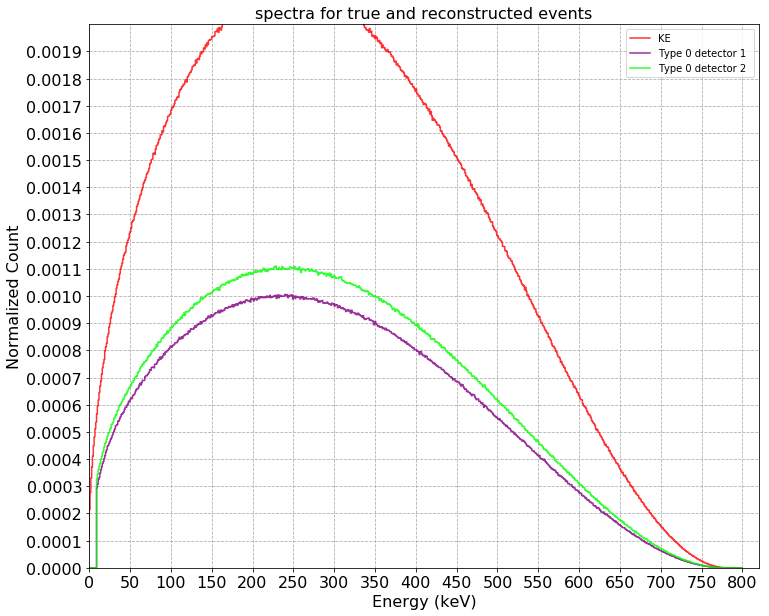

In [13]:
#nEvents = 80000000
nEvents = 80000000
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
   # ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
   # plt.step(x=ucna_item["Evals"], y=ucna_item["EdepType0;1"] / NTot, c='blue'  ,alpha = 0.8, label='UCNA')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["KE;1"] / nEvents, c='red',alpha = 0.8, label='KE')
    #plt.step(x=ucnap_item["Evals"], y=ucnap_item["eTrue1;1"] / nEvents, c='blue',alpha = 0.8, label='KE cos(theta) > 0 ')
    #plt.step(x=ucnap_item["Evals"], y=ucnap_item["eTrue2;1"] / nEvents, c='green',alpha = 0.8, label='KE cos(theta) < 0')
#
    #plt.step(x=ucnap_item["Evals"], y=ucnap_item["direct01Thr;1"] / nEvents, c='purple',alpha = 0.8, label='Type 0 detector 1 cos(theta) > 0')
    #plt.step(x=ucnap_item["Evals"], y=ucnap_item["direct02Thr;1"] / nEvents, c='lime',alpha = 0.8, label='Type 0 detector 2  cos(theta) < 0')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType01;1"] / nEvents, c='purple',alpha = 0.8, label='Type 0 detector 1')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType02;1"] / nEvents, c='lime',alpha = 0.8, label='Type 0 detector 2 ')


    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"spectra for true and reconstructed events", fontsize=16)
    plt.ylim(0.0, 0.0020)
    plt.yticks(np.arange(0, 0.0020, 0.0001), fontsize=16)
    plt.xlim(0, 820)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
  #  plt.savefig(f'./mar/checking-eventgenchangeddd/spectra1kevbinwidth{str(key)}.png')
  

In [ ]:
a0 = []
erra0 = []

a1 = []
erra1 = []

a_type0mis = []
a_type1mis = []

erra_type0mis = []
erra_type1mis = []

In [ ]:

def linear_function(x, m, b):
    return m * x + b


In [ ]:
atrue = []
erratrue = []


In [20]:
# Define your linear function
def linear_function(x, m, b):
    return m * x + b

# Define your data types
#data_types = ['a_true_beta', 'a_type0_beta', 'a_type1_beta', 'a_type0mis_beta','a_type1mis_beta']
data_types = ['a_true', 'a_type0', 'a_type1']

# Define your data types
data_colors = ['skyblue', 'salmon', 'limegreen']#, 'chocolate', 'yellowgreen']  # Define colors for each data type
plot_colors = ['blue', 'red', 'green']#, 'brown', 'green']  # Define colors for each data type

data_ylims = [-0.2,-0.2,-0.5]#,-0.75,-0.75]#, 0.5, -0.1, -0.05]  # Define y-limits for each data type

# Your list of energies
E_list = [50,100, 120, 150, 180, 220, 260, 300]

# Dictionary to store fitted parameters for each data type
parameters_dict = {data_type: {'a_values': [], 'm_values': []} for data_type in data_types}

# Iterate over each data type
for data_index, data_type in enumerate(data_types):
    # Iterate over each key in ucnaP_df
    for key in ucnaP_df.keys():
        # Temporary lists to store fitted parameters for the current key and data type
        a_values = []
        m_values = []
        # Iterate over each energy in E_list
        for Ewin in E_list:  
            fitting_range = (Ewin, 660)  # Example: fit between x=2 and x=4
            x_data = ucnaP_df[key]['EMidNew']
            y_data = ucnaP_df[key][data_type]  # Use the current data type
    
            # Filter the data
            mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1]) & (~np.isnan(y_data))
            x_data_filtered = x_data[mask]
            y_data_filtered = y_data[mask]
    
            # Perform curve fitting
            params, covariance = curve_fit(linear_function, x_data_filtered, y_data_filtered)
            fitted_m = params[0]
            fitted_b = params[1]
            
            # Append fitted parameters to temporary lists
            a_values.append(fitted_b)
            m_values.append(fitted_m)
    
            # Plotting
            plt.figure(figsize=(12, 10))
            plt.errorbar(x_data, y_data, alpha=0.8, yerr=ucnaP_df[key]['err'+data_type], color=data_colors[data_index], fmt='o', label=f'{data_type} events')
            plt.plot(x_data_filtered, linear_function(x_data_filtered, *params), label='UCNA+ - fit', color=plot_colors[data_index], zorder=10)
            plt.xlabel("Energy (keV)", fontsize=16)
            plt.ylabel(r"$A_1 = \frac{\frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\frac{\beta}{2}}$", fontsize=16)
            plt.ylim(data_ylims[data_index], 0.0)  # Use different ylim for each data type
            plt.yticks(fontsize=16)
            plt.xlim(0, 800)
            plt.xticks(np.arange(0, 800, 25), fontsize=14, rotation=45)
            plt.grid(linestyle='--')
            plt.legend(fontsize=16)
            plt.title(f"Asymmetry {data_type} E_thr > 10 [{Ewin}, 660] keV", fontsize=16)
            plt.text(0.5, 0.95, f"Fitted A: {fitted_b:.4f}, Fitted m: {fitted_m:.6f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), fontsize=16)
            plt.savefig(f'./mar/checking-eventgenchangeddd/ameas_{data_type}_BS{str(Ewin)}660.png')
            plt.close()  # Close the plot to avoid displaying it
        
        # Append the temporary lists of fitted parameters to the dictionary
        parameters_dict[data_type]['a_values'].append(a_values)
        parameters_dict[data_type]['m_values'].append(m_values)

# Now parameters_dict contains fitted b and m values for each data type separately


In [ ]:
a_type0_beta_params = parameters_dict['a_type0_beta']['a_values']
#a_values = a_type0_beta_params['a_values']
print(a_type0_beta_params[0])

In [34]:
def aTot(df, NTot, a0,a1, a_true,Ewin):#a0_misid,a1_misid, Ewin):
   # parameters_dict[]['a_values']
    df = df[(df["Evals"] > Ewin )& (df["Evals"] < 660)]
    print(f'{Ewin}')
    
    n0 = df["EdepType01;1"].sum()+df["EdepType02;1"].sum()
    n1 = df["EdepType11;1"].sum()+df["EdepType11;1"].sum()
   
   # n0 = df["direct01;1"].sum()+df["direct02;1"].sum()
   # n1 = df["direct11;1"].sum()+df["direct12;1"].sum()
   
   # n0_misid = df["misEdepType01;1"].sum() + df["misEdepType02;1"].sum()
   # n1_misid = df["misEdepType11;1"].sum() + df["misEdepType12;1"].sum()    
    
   # print(f'r0-misid : {n0_misid/NTot}, r1-misid : {n1_misid/NTot}')
    #a_misid = (n0_misid/NTot)*a0_misid + (n1_misid/NTot)*a1_misid
    a_typei = (n0/NTot)*a0  +(n1/NTot)*a1  #includes misbackscattred

    a_analysis = a_typei #- a_misid
    
    delta = (a_true - a_analysis) /(a_true)
    print(f'a_typei  : {a_typei}, atrue : {a_true}, delta : {delta}')
    
    return n0,n1,a_analysis, delta 

In [35]:
E_list = [50,100, 120,150,180,220,260,300]

nWindow = len(E_list)
N0 = {}
N1 = {}
aType0and1 = {}
correction= {}
for i, key in enumerate(ucnaP_df.keys()):
    N0[key] = []
    N1[key] = []
    aType0and1[key] = [] 
    correction[key] = [] 
   # x0 = parameters_dict['a_type0_beta']['a_values'][0]
   # x1 = parameters_dict['a_type1_beta']['a_values'][0]
   # xTrue = parameters_dict['a_true_beta']['a_values'][0]
    x0 = parameters_dict['a_type0']['a_values'][0]
    x1 = parameters_dict['a_type1']['a_values'][0]
    xTrue = parameters_dict['a_true']['a_values'][0]
    
    print(f"======= {key}0 keV cutoff =======")
    for j in np.arange(len(E_list)):
        #print(x0[j])
        print(f'{j} analysis window ')
        #print(f'element number {nWindow*i + j}')
        n0,n1,a_analysis, delta  = aTot(ucnaP_df[key], NTot = nTot[j], a0 = x0[j], a1= x1[j],a_true= xTrue[j], Ewin= E_list[j])#a0_misid = parameters_dict['a_type0mis_beta']['a_values'][0][j],a1_misid = parameters_dict['a_type1mis_beta']['a_values'][0][j], Ewin= E_list[j])
        N0[key].append(n0)
        N1[key].append(n1)
        aType0and1[key].append(a_analysis)  
        correction[key].append(delta) 
      
     #   print(f'aCorrEvs : {a_corrEvts}, aMisid :{aMisid}, A_mc : {aMC}, correction : {delta}')
        print('------------------------------------------')
        


======= 10 keV cutoff =======
0 analysis window 
50
a_typei  : -0.1512794939406264, atrue : -0.11805004383480722, delta : -0.2814861310201516
------------------------------------------
1 analysis window 
100
a_typei  : -0.1423600504948351, atrue : -0.11794013960474774, delta : -0.2070534338175765
------------------------------------------
2 analysis window 
120
a_typei  : -0.1401547344930697, atrue : -0.11793639309613041, delta : -0.1883925802176181
------------------------------------------
3 analysis window 
150
a_typei  : -0.1375549663268033, atrue : -0.11790252936802914, delta : -0.1666837604257809
------------------------------------------
4 analysis window 
180
a_typei  : -0.13571719316044453, atrue : -0.11805134270322701, delta : -0.14964548519899737
------------------------------------------
5 analysis window 
220
a_typei  : -0.13358566031467675, atrue : -0.11811092638953018, delta : -0.1310186483010967
------------------------------------------
6 analysis window 
260
a_typei  

In [31]:
correction["1"]

[-0.2814861310201516,
 -0.2070534338175765,
 -0.1883925802176181,
 -0.1666837604257809,
 -0.14964548519899737,
 -0.1310186483010967,
 -0.11847155174037147,
 -0.10310829198970636]

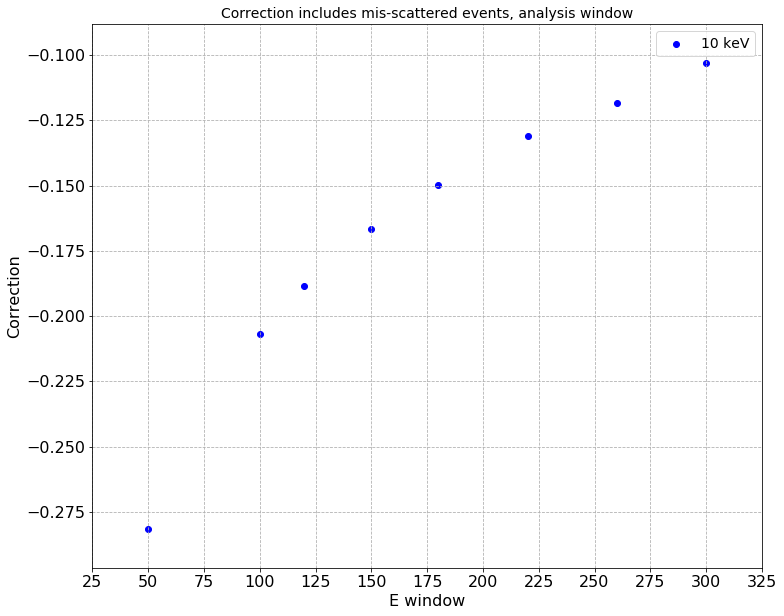

In [32]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = correction["1"],color='blue',label = '10 keV')
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(np.arange(25,350,25),fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Correction includes mis-scattered events, analysis window', fontsize = 14)
plt.savefig(f'./mar/checking-eventgenchangeddd/correction_1kev_binwidth_includes_misscater.png')


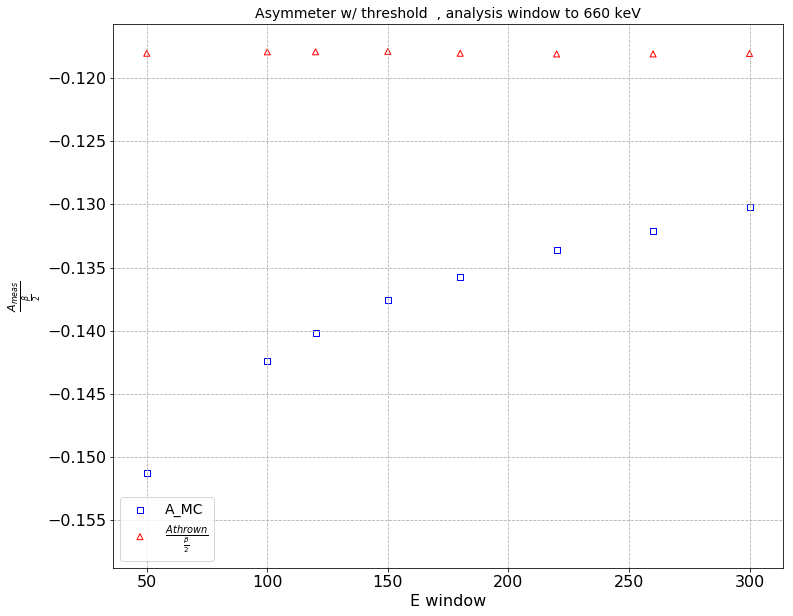

In [36]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = aType0and1["1"],marker = 's', facecolors='none', edgecolors='blue',label = 'A_MC')
plt.scatter(x= E_list, y = xTrue,marker = '^', facecolors='none', edgecolors='red',label = r'$\frac{Athrown}{\frac{\beta}{2}}$')

plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmeter w/ threshold  , analysis window to 660 keV', fontsize = 14)
plt.savefig(f'./mar/checking-eventgenchangeddd/asymmetries_misscatteredincluded_1kev_binwidth.png')


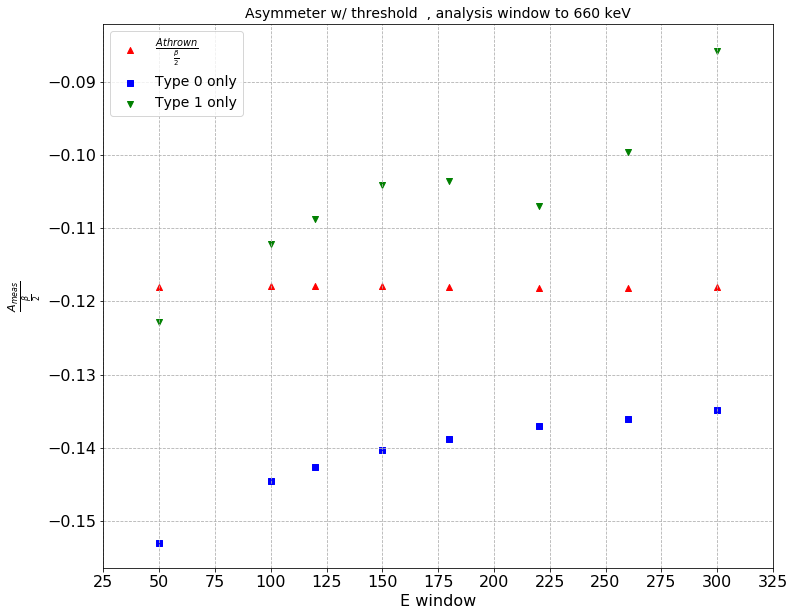

In [38]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = xTrue,marker = '^', color='red',label = r'$\frac{Athrown}{\frac{\beta}{2}}$')
plt.scatter(x= E_list, y = x0,marker = 's', color='blue',label = 'Type 0 only')
plt.scatter(x= E_list, y = x1,marker = 'v', color='green',label = 'Type 1 only')
#plt.scatter(x= E_list, y = parameters_dict['a_type0mis_beta']['a_values'][0],marker = 'o',color='orange',label = 'Misid type 0')

plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(np.arange(25,350,25),fontsize = 16)
plt.yticks(fontsize = 16)

plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmeter w/ threshold  , analysis window to 660 keV', fontsize = 14)
plt.savefig(f'./mar/checking-eventgenchangeddd/asymmetry_type0_type1_true_includes_misscatter_1keVbinwidth.png')


In [ ]:
plt.figure(figsize=(12, 10))

plt.errorbar(x= E_list, y = atrue,yerr = erratrue,fmt= 'o',  color='blue',label = 'A_true')
plt.errorbar(x= E_list, y = a0   ,yerr = erra0   ,fmt= 'o',  color='red', label = 'A_type 0')
plt.errorbar(x= E_list, y = a1   ,yerr = erra1   ,fmt= 'o',  color='green',label = 'A_type 1')

#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetry including scattering for 10 keV threshold across different window till 660 keV', fontsize = 14)
plt.savefig(f'./mar/checking-eventgenchangeddd/asymmetry_meas_fit.png')


In [ ]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = correction["1"],marker = 's', facecolors='none', edgecolors='blue',label = '10 keV')
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E windoq', fontsize = 16)
plt.title(f'Correction ALL w/ threshold , analysis window', fontsize = 14)
#plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/changedBetacorrectionsAllEthtype0includesBS.png')


There are two ways to get the correction $\Delta_i$

$
\begin{equation}
    \Delta_i = \frac{(m * x_i + A_i) - A_{meas, i}}{(m * x_i + A_i)} where A_{meas, i} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}   
    for ith bin
\end{equation}  $
and then fit for $\Delta_i$

or just use the intercepts i.e $A$

In [ ]:
analysingwindow =(180,660)
A_thrown = a_true0_beta_fit * weight_180 # weight_180_i = weight of events in window [180, 660] for "i" type of event
A_mc = (weight_180_type0 * a_type0_fit) + (weight_180_type1 * atype1_fit)
correction = (A_thrown - A_mc)/A_thrown
